In [369]:
from __future__ import division
import numpy as np
np.seterr(divide = 'ignore') 

import matplotlib.pyplot as plt
from scipy.signal import tf2zpk, freqz, dimpulse, dlsim, dlti, convolve
from scipy.special import binom
import matplotlib.colors as mcolors

#resize graph "figures"
plt.rcParams['figure.figsize'] = [10, 6]

# Lab 2 - Transform√©e en Z

*Arden Diakahte-Palme (et ceux de votre groupe)* - *Votre SCIPER (et ceux de votre groupe)*

Sc√©ance le 20.10.2021, √† rendre pour le 3.11.2021

# 1. Fonction de transfert (5 pts)


On consid√®re la fonction de transfert:

$$
H(z) = \frac{0.2066+0.4132z^{-1}+0.2066z^{-2}}{1-0.3695z^{-1}+0.1958z^{-2}}
$$

### 1.1 Filtre, p√¥les et z√©ros
Trouver les p√¥les et les z√©ros de $H(z)$. Vous pouvez vous aider de la fonction [tf2zpk](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.tf2zpk.html). Quel est le gain de ce filtre ?
Le gain de ce filtre est 0.2066

In [370]:
b= np.array([0.2066, 0.4132, 0.2066])
a= np.array([1, -0.3695, 0.1958])

(z, p, k)= tf2zpk(b,a)
print((z,p,k))

(array([-1., -1.]), array([0.18475+0.40207889j, 0.18475-0.40207889j]), 0.2066)


Dessiner les p√¥les et les z√©ros  de $H(z)$ dans le plan complexe.

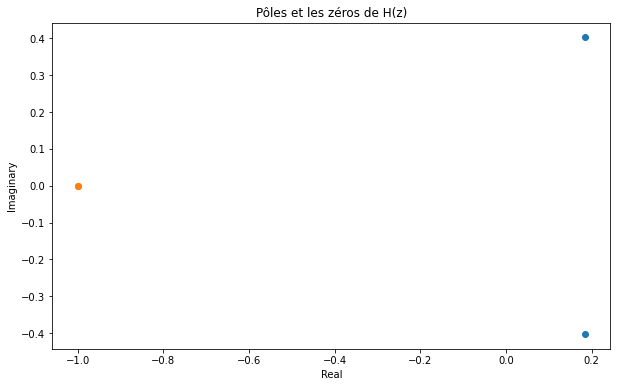

In [371]:
fig, ax1 = plt.subplots(1)
ax1.set_xlabel('Real')
ax1.set_ylabel('Imaginary')
ax1.set_title('P√¥les et les z√©ros de H(z)')

ax1.scatter(p.real,p.imag)
ax1.scatter(z.real,z.imag)
plt.show()

### 1.2 R√©ponse en fr√©quence


Tracer la r√©ponse en fr√©quence (amplitude et phase) du filtre $H(z)$. Utiliser $N=1024$ points. Vous pouvez vous aider de la fonction [freqz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html). Quel genre de filtre est $H$ (passe-bas, passe-bande, passe-haut) ? Le flitre $H$ est un filtre passe-bas.

In [372]:
def dB(x):
    return 20 * np.log10(abs(x))

N_points= 1024 
w, h= freqz(b,a,N_points)

fig, ax1 = plt.subplots(1)
ax1.set_xlabel('Frequency [rad/samples]')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_title('R√©ponse de Fr√©quence')
ax1.plot(w, dB(h), color='b')

ax2 = ax1.twinx()
angles_rad = np.unwrap(np.angle(h))
ax2.plot(w, angles_rad, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.plot(w, angles_rad, color='g')
ax2.grid()

plt.show()


### 1.3 R√©ponse impultionelle

* Tracer les 64 premiers points de la r√©ponse impulsionnelle (dirac) du filtre $H$ √† l'aide la fonction [dimpulse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dimpulse.html). Vous pouvez utiliser la fonction [stem](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html) pour tracer la r√©ponse.

* Cette fois, tracer les 64 premiers points de la r√©ponse impulsionnelle $h[n]$ du filtre $H$ √† l'aide la fonction [dlsim](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlsim.html). Quelle est la diff√©rence entre ces deux fonctions ? Le r√©sultat est-il le m√™me ?
    * The two graphs below are the same because the impulse response $h[n]$ of an LTI system is equal to the output of the LTI system when the input is the dirac-delta function $\delta[n]$.

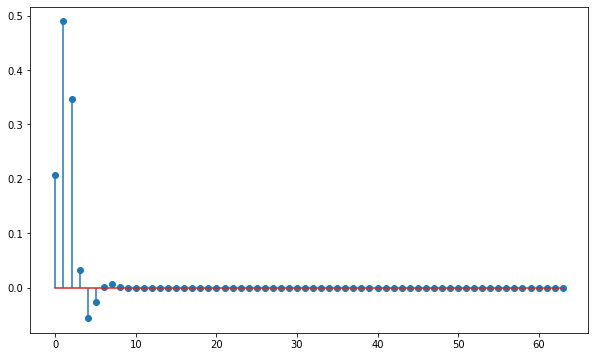

In [373]:
#impulse response calculated directly
tout, yout= dimpulse((b,a,1), n=64)

fig, ax1 = plt.subplots(1)
plt.stem(tout, np.squeeze(yout))
plt.show()

#impulse response calculated as system response of dirac delta function
dirac_delta= np.zeros((1,64))
dirac_delta= np.squeeze(dirac_delta)
dirac_delta[0]= 1.0;

tout1, yout1= dlsim((b,a,1), dirac_delta)
plt.stem(tout1, np.squeeze(yout1))

plt.show()

### 1.3 R√©ponse d'un signal discret

On consid√®re le signal:
$$
    x[n] = \cos(0.2\pi n) + cos(0.8\pi n)
$$
Utiliser ce que vous avez appris lors des points pr√©c√©dents pour tracer:
* la magnitude et la phase du signal. (Hint: vu qu‚Äôon a un signal de dur√©e limit√©e, sa transform√©e Z va avoir un d√©nominateur √† 1, et les coefficients de son num√©rateur seront exactement celle du signal original).
* le r√©sultat du signal x[n] filtr√© par $H(z)$ ainsi que sa r√©ponse fr√©quentielle. Quel est l'effet du filtre sur notre signal ?

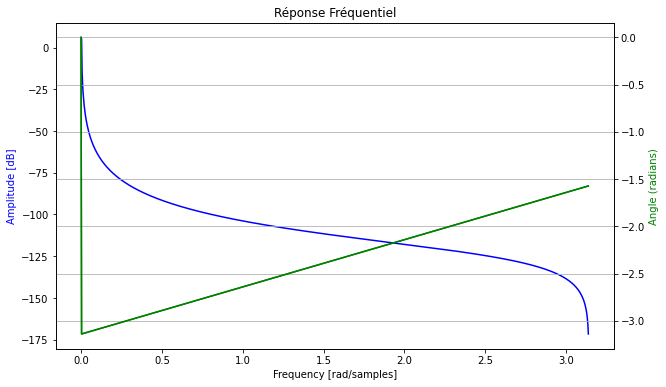

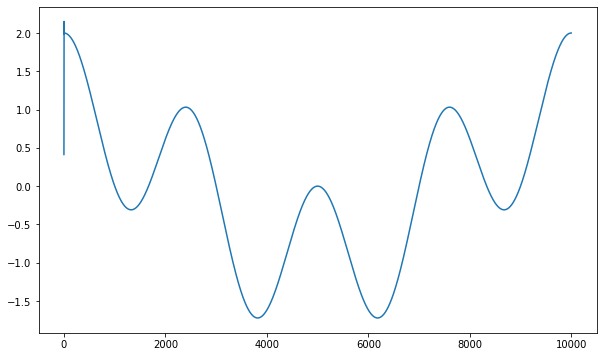

In [421]:
N_points= 10000
freq= 10

n= np.linspace(0, freq, N_points)
x_n= np.cos(0.2*np.pi*n) + np.cos(0.8*np.pi*n)
(w_x, h_x)= freqz(x_n, 1, 1000)

# Plotting the Magnitude and Phase
fig, ax1 = plt.subplots(1)
ax1.set_xlabel('Frequency [rad/samples]')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_title('R√©ponse Fr√©quentiel')
ax1.plot(w_x, dB(h_x), color='b')

ax2 = ax1.twinx() 
angles_rad = np.unwrap(np.angle(h_x))
ax2.plot(w_x, angles_rad, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.plot(w_x, angles_rad, color='g')
ax2.grid()


(tout, yout)= dlsim((b, a, 1),x_n)
fig, ax1 = plt.subplots(1)
ax1.plot(tout, yout)

plt.show()

# 2. Syst√®me causal (4 pts)

Soit une famille de syst√®mes parametr√©e par $N$ avec transform√©es en z suivantes:

$$ H_N(z) = (z^{-1} - 2)^N - z^{-N} $$


1. Donnez une formule pour les r√©ponses impulsionelles de ces syst√®mes.

*Votre r√©ponse ici*

2. Calculez, num√©riquement pour $N \in \{2, 4, 6, 10\}$ les z√©ros de ces syst√®mes et affichez les sur un diagramme p√¥les-z√©ros. Vous pouvez vous aider de la fonction `scipy.special.binom`.

In [375]:
def getPolesZeros(N):
    numer= list()
    for i in range(1,N+1):
        ele= binom(N, i) * ((-2) ** (i))
        numer.append(ele)
    #print(numer)

    denom= np.zeros(len(numer))
    denom[0]= 1.0
    return (numer,denom)

fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[1,0].set_xlabel('Real')
axs[1,1].set_xlabel('Real')
axs[0,0].set_ylabel('Imaginary')
axs[1,0].set_ylabel('Imaginary')


#plot the poles and zeros for each N
test_set= [2,4,6,10]
graph_set= [(0,0),(0,1),(1,0),(1,1)]
for i in range(4):
    (b,a)= getPolesZeros(test_set[i])
    (z,p,k)= tf2zpk(b, a)

    ax= axs[graph_set[i][0],graph_set[i][1]]    
    ax.scatter(p.real,p.imag)
    ax.scatter(z.real,z.imag)
    ax.set_title("Z√©ros pour N={}".format(test_set[i]))
    
    
plt.show()

3. Sur la base de la position des z√©ros uniquement, quel est le type de cette famille de filtres (passe-haut, passe-bas, passe-bande, coupe-bande)? 
    * Based on the graph of the zeros of the transfer function, this family of filters describes a band-reject (coupe-bande) filter

4. Affichez leurs r√©ponses en fr√©quence (en amplitude et en phase, avec une √©chelle logarithmique pour le premier) pour les valeurs $N \in \{2, 4, 6, 10\}$. Quel est l'effet de l'augmentation de $N$? (Avant d'afficher la r√©ponse en amplitude des filtres, normaliser leur gain, i.e. divisez les coeficients de la r√©ponse impulsionelle par la somme de leurs valeurs absolues)
    - As $N$ increases, the filter $H_N(z)$ attenuates lower frequencies much more. In the case that $N=2$, between 0.25 and 0.5 rad/samples, the amplitude of the frequency response is approximately -20dB, however, when $N=10$, the amplitude of the frequency response (between 0.25 and 0.5 rad/samples) is approximately -90dB. Also, frequencies close to 0 rad/sample are most attenuated by this filter, and the phase shift decreases faster with greater even values of  ùëÅ
    - Furthermore, the filter $H_N(z)$ effectuates a greater phase shift as $N$ increases. 

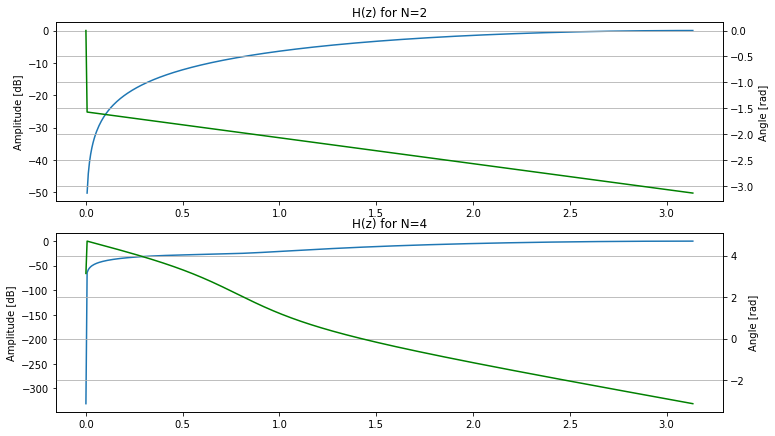

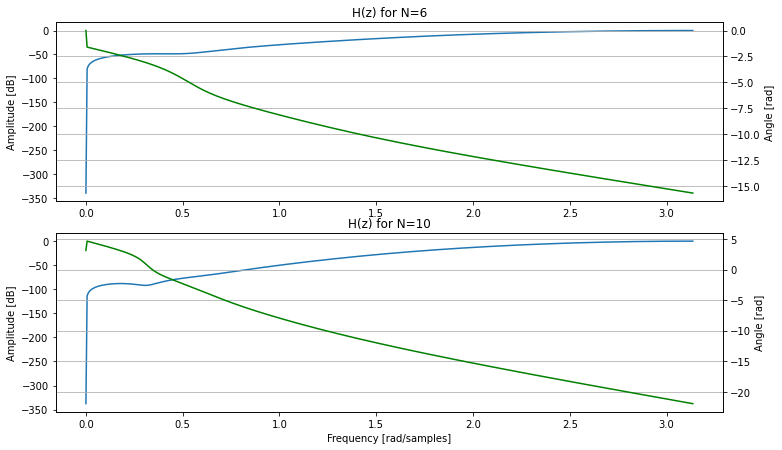

In [376]:
def plotMagPhase(b,a,ax):
    w, h= freqz(b,a)

    ax.plot(w, 20 * np.log10(abs(h)))

    ax1 = ax.twinx()
    angles_rad = np.unwrap(np.angle(h))
    ax1.plot(w, angles_rad, 'g')
    ax1.set_ylabel('Angle [rad]')
    ax1.grid()
    
fig, axs = plt.subplots(2,1)
fig.tight_layout()

fig_1, axs_1 = plt.subplots(2,1)
fig_1.tight_layout()
axs_1[1].set_xlabel('Frequency [rad/samples]')


#plot the amplitude and phase of each TF's freq response
test_set= [2,4,6,10]
graph_set= [axs[0],axs[1],axs_1[0],axs_1[1]]
for i in range(4):
    (b,a)= getPolesZeros(test_set[i])
    
    #normalize each TF's gain
    norm= 0
    for ele in b:
        norm += abs(ele)
    b /= norm
    
    ax= graph_set[i]
    plotMagPhase(b,a,ax)
    ax.set_title("H(z) for N={}".format(test_set[i]))
    ax.set_ylabel('Amplitude [dB]')
    
    
plt.show()

5. R√©p√©tez les points 2.,3. et 4. pour les syst√®mes du type:
$$ \hat{h}_N[n] = \begin{cases} h_N[n/2] \text{ si } n \text{ pair} \\ 0 \text{ sinon}\end{cases}$$
o√π $h_N$ est la r√©ponse impulsionelle des filtres d√©finis ci-dessus. Quelle est l'effet de la transformation $h_N \implies \hat{h}_N$ ?
    - $\textbf{Question 2.3}$: Sur la base de la position des z√©ros uniquement, quel est le type de cette famille de filtres (passe-haut, passe-bas, passe-bande, coupe-bande)? 
        - Based on the graph of the zeros of the transfer function, this family of filters describes a band-reject (coupe-bande) filter
    - $\textbf{Question 2.5}$: Affichez leurs r√©ponses en fr√©quence (en amplitude et en phase, avec une √©chelle logarithmique pour le premier) pour les valeurs $N \in \{2, 4, 6, 10\}$. Quel est l'effet de l'augmentation de $N$?
        - Since $N\in{2,4,6,10}$ could only take even values when considering $h_N[n]$, the transformation $h_N \implies \hat{h}_N$ introduces odd values of N, which alters the behavior of the filter's frequency response (as observed in its amplitude and phase), as discussed below. 
        - For $N\in2\mathbb{Z}^++1$, there is a significant decrease in the amplitude of the transfer function with a valley located between 0.25 and 0.5 samples/radians (i.e frequencies at the trough of this valley are the ones which are the most severly attenuated by this filter). At this valley, the phase shift also decreases rapidly, although then returns to its normal rate of decrease. After this valley, frequencies greater than 0.5 rad/sample are still attenuated but in an ever-decreasing fashion (as frequency increases). 
        - For $N\in2\mathbb{Z}^+$, frequencies between 0.25 and 0.5 radians/sample are more attenuated than frequencies greater than 0.5 rad/sample (with this degree of attenuation incerasing with $N$). Also, frequencies close to 0 rad/sample are most attenuated by this filter, and the phase shift decreases faster with greater even values of $N$

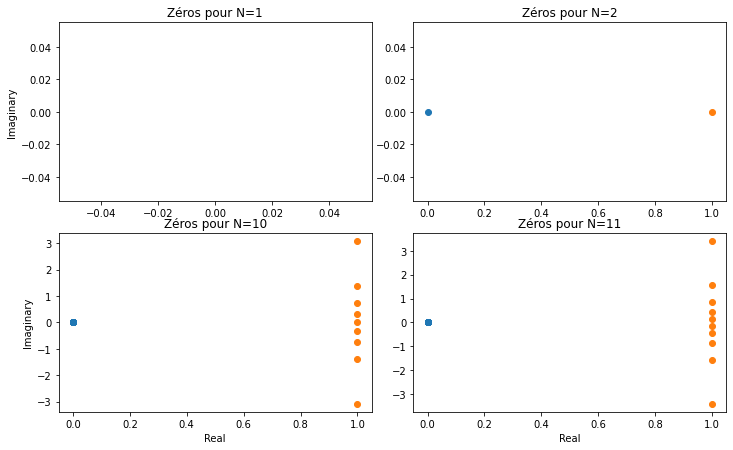

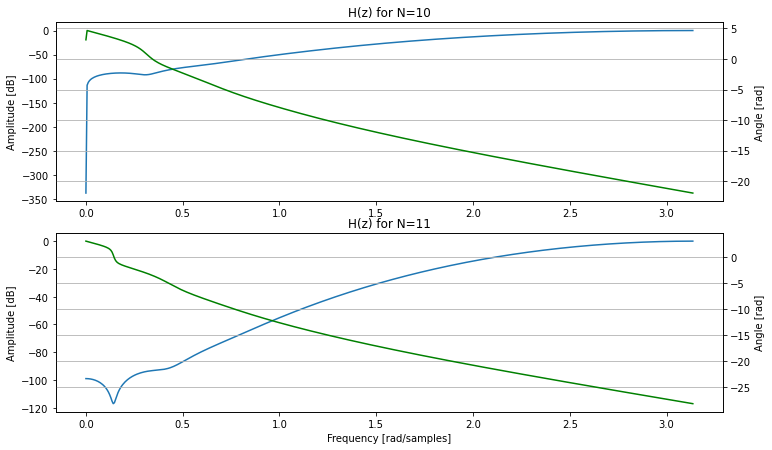

In [377]:
# Question 2.2 
fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[1,0].set_xlabel('Real')
axs[1,1].set_xlabel('Real')
axs[0,0].set_ylabel('Imaginary')
axs[1,0].set_ylabel('Imaginary')


#plot the poles and zeros for each N
test_set= [2,4,20,22]
graph_set= [(0,0),(0,1),(1,0),(1,1)]
for i in range(len(graph_set)):
    N= int(test_set[i]/2) #since all N in the given set are even
    (b,a)= getPolesZeros(N) 
    (z,p,k)= tf2zpk(b, a)

    ax= axs[graph_set[i][0],graph_set[i][1]]    
    ax.scatter(p.real,p.imag)
    ax.scatter(z.real,z.imag)
    ax.set_title("Z√©ros pour N={}".format(N))


#Question 2.3: see above
#Question 2.4
fig_2, axs_2 = plt.subplots(2,1)
fig_2.tight_layout()

fig_1, axs_1 = plt.subplots(2,1)
fig_1.tight_layout()
axs_1[1].set_xlabel('Frequency [rad/samples]')


#plot the amplitude and phase of each TF's freq response
graph_set= [axs_2[0],axs_2[1],axs_1[0],axs_1[1]]
for i in range(len(graph_set)):
    N= int(test_set[i]/2) #since all N in the given set are even
    (b,a)= getPolesZeros(N)
    
    #normalize each TF's gain
    norm= 0
    for ele in b:
        norm += abs(ele)
    b /= norm
    
    ax= graph_set[i]
    plotMagPhase(b,a,ax)
    ax.set_title("H(z) for N={}".format(N))
    ax.set_ylabel('Amplitude [dB]')


plt.show()

# 3. Stabilit√© (3 pts)

Soit les syst√®mes suivant:
$$ G_1(z) = \frac{1 + 0.3 z^{-1}}{1 + 0.8z^{-1} - 0.3 z^{-2}}$$
$$ G_2(z) = \frac{1 + 0.3 z^{-1}}{1 + 0.5z^{-1} - 0.3 z^{-2}}$$
1. Pour les deux syst√®mes, affichez les 32 premiers √©l√©ments de leurs r√©ponses impulsionelles ainsi que leur p√¥les et leurs z√©ros sur le diagramme du m√™me nom. Est-ce que les syst√®mes sont stables?  
    - $G_1(z)$ d√©crit un syst√®me stable car son ROC inclut le cercle d'unit√©, en revanche, $G_2(z)$ ne d√©crit pas un syst√®me stable car le cercle d'unit√© n'est pas inclut dans son ROC.

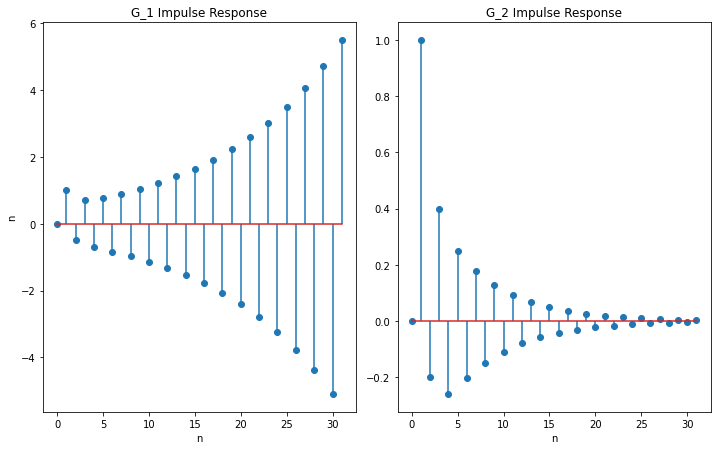

In [378]:
#G_1(z)
b1= np.array([1, 0.3])
a1= np.array([1, 0.8, -0.3])

#G_2(z)
b2= np.array([1, 0.3])
a2= np.array([1, 0.5, -0.3])

#Poles and Zeros
(z1, p1, k1)= tf2zpk(b1,a1)
(z2, p2, k2)= tf2zpk(b2,a2)

fig_1, axs= plt.subplots(1,2)
fig_1.tight_layout()
axs[0].set_title('G_1 Poles and Zeros')
axs[0].set_xlabel('Real')
axs[0].set_ylabel('Imaginary')
axs[0].scatter(z1.real, z1.imag)
axs[0].scatter(p1.real, p1.imag)

axs[1].set_title('G_2 Poles and Zeros')
axs[1].set_xlabel('Real')
axs[1].scatter(z2.real, z2.imag)
axs[1].scatter(p2.real, p2.imag)

#Impulse Response
tout1, yout1= dimpulse((b1,a1,1), n=32)
tout2, yout2= dimpulse((b2,a2,1), n=32)

fig_2, axs_2= plt.subplots(1,2)
fig_2.tight_layout()

axs_2[0].set_title('G_1 Impulse Response')
axs_2[0].set_xlabel('n')
axs_2[0].set_ylabel('n')
axs_2[0].stem(tout1, np.squeeze(yout1))
axs_2[1].set_title('G_2 Impulse Response')
axs_2[1].set_xlabel('n')
axs_2[1].stem(tout2, np.squeeze(yout2))


plt.show()


2.Supposons qu'en fait le syst√®me $G_\alpha(z)$ soit impl√©ment√© avec une puce √©lectronique d√©fectueuse qui pr√©sente une valeur de $\alpha$ uniform√©ment distribu√©e entre $0$ et $1$ √† chaque fois que le syst√®me est utilis√©.
$$ G_\alpha(z) = \frac{1 + 0.3 z^{-1}}{1 + \alpha z^{-1} - 0.3 z^{-2}}$$
Estimez num√©riquement la probabilit√© que le syst√®me $G_a(z)$ soit stable. Vous pouvez vous aider de la fonction `np.random.rand()`.

For the system to be stable we must have that $\alpha \geq 0.7$, and considering that $\alpha$ was randomly chosen from the continuous uniform distribution $U_{[0,1]}$, we have that the probability that the system is stable is $P(\alpha \geq 0.7) = P(X \geq 0.7)= 0.3$

0.7760884463121017
[-0.3] [-1.05929553  0.28320709]


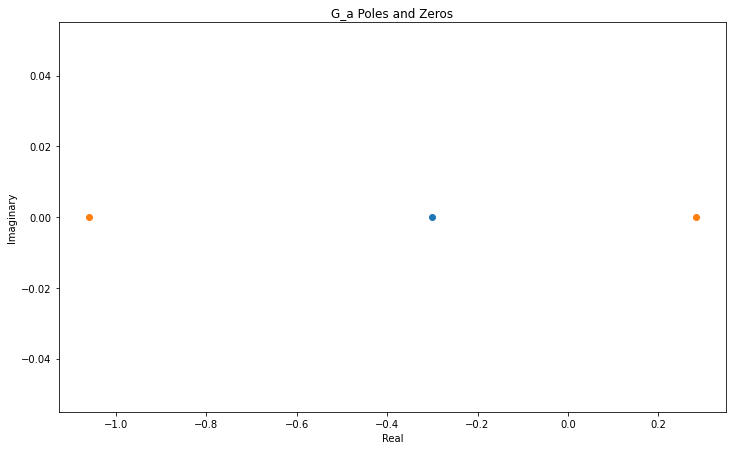

In [415]:
#G_a(z)
alpha= np.random.rand()
print(alpha)

b1= np.array([1, 0.3])
a1= np.array([1, alpha, -0.3])

#Poles and Zeros
(z1, p1, k1)= tf2zpk(b1,a1)
print(z1,p1)

fig_1, axs= plt.subplots(1,1)
fig_1.tight_layout()
axs.set_title('G_a Poles and Zeros')
axs.set_xlabel('Real')
axs.set_ylabel('Imaginary')
axs.scatter(z1.real, z1.imag)
axs.scatter(p1.real, p1.imag)

plt.show()